In [1]:
import torch
import torchvision
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from eda_utils import rle_to_indices

In [2]:
df = pd.read_csv('../data/train.csv')

df = df[df.ClassId.isin([1, 3])]

num_classes_by_image = df.groupby(by='ImageId').size()
multiple_defect_classes = num_classes_by_image[num_classes_by_image > 1]
multiple_defect_classes_mask = df.ImageId.isin(multiple_defect_classes.index)
print(f'Removing {np.sum(multiple_defect_classes_mask)} images with multiple defect classes')
df = df[~multiple_defect_classes_mask]

df = df.sample(frac=0.01, random_state=42)
print(df.shape)
df

Removing 186 images with multiple defect classes
(59, 3)


,ImageId,ClassId,EncodedPixels
1320,301601620.jpg,1,100643 3 100897 7 101151 11 101404 17 101658 2...
32,00f1665e6.jpg,3,238918 90 239174 90 239430 89 239686 89 239942...
1329,306b1dbc1.jpg,3,38657 118 38913 235 39169 235 39425 234 39681 ...
3673,85c5631bd.jpg,3,99079 42 99334 126 99590 209 99845 252 100101 ...
4985,b44f92bd6.jpg,3,34022 26 34227 77 34432 128 34638 178 34843 22...
1725,3ffa37e37.jpg,3,151451 51 151707 101 151962 102 152218 102 152...
1184,2b16d6f98.jpg,3,7419 3 7671 7 7922 12 8173 17 8425 21 8676 26 ...
1364,31716f6ae.jpg,3,1138 21 1392 45 1646 49 1901 52 2155 56 2409 6...
6011,d7a966551.jpg,3,277024 8 278095 79 278321 131 278547 183 27878...
5748,ce68af0bf.jpg,3,222167 9 222415 19 222670 22 222926 25 223181 ...


In [3]:
%%time
df['indices'] = df.EncodedPixels.apply(rle_to_indices)
df

CPU times: user 2.66 s, sys: 26.7 ms, total: 2.69 s
Wall time: 2.69 s


,ImageId,ClassId,EncodedPixels,indices
1320,301601620.jpg,1,100643 3 100897 7 101151 11 101404 17 101658 2...,"([393, 393, 393, 394, 394, 394, 394, 394, 394,..."
32,00f1665e6.jpg,3,238918 90 239174 90 239430 89 239686 89 239942...,"([933, 933, 933, 933, 933, 933, 933, 933, 933,..."
1329,306b1dbc1.jpg,3,38657 118 38913 235 39169 235 39425 234 39681 ...,"([151, 151, 151, 151, 151, 151, 151, 151, 151,..."
3673,85c5631bd.jpg,3,99079 42 99334 126 99590 209 99845 252 100101 ...,"([387, 387, 387, 387, 387, 387, 387, 387, 387,..."
4985,b44f92bd6.jpg,3,34022 26 34227 77 34432 128 34638 178 34843 22...,"([132, 132, 132, 132, 132, 132, 132, 132, 132,..."
1725,3ffa37e37.jpg,3,151451 51 151707 101 151962 102 152218 102 152...,"([591, 591, 591, 591, 591, 591, 591, 591, 591,..."
1184,2b16d6f98.jpg,3,7419 3 7671 7 7922 12 8173 17 8425 21 8676 26 ...,"([28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 30, ..."
1364,31716f6ae.jpg,3,1138 21 1392 45 1646 49 1901 52 2155 56 2409 6...,"([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,..."
6011,d7a966551.jpg,3,277024 8 278095 79 278321 131 278547 183 27878...,"([1082, 1082, 1082, 1082, 1082, 1082, 1082, 10..."
5748,ce68af0bf.jpg,3,222167 9 222415 19 222670 22 222926 25 223181 ...,"([867, 867, 867, 867, 867, 867, 867, 867, 867,..."


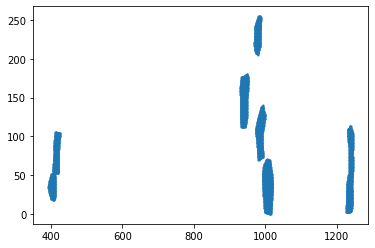

In [4]:
row = df.iloc[0, :]
plt.scatter(row.indices[0], row.indices[1], s=1)

CPU times: user 150 ms, sys: 2.9 ms, total: 153 ms
Wall time: 149 ms


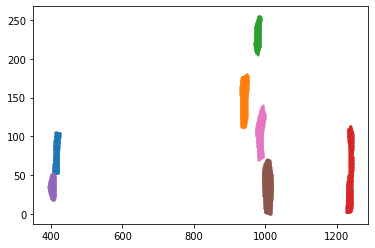

In [5]:
%%time


def get_adjacents(x, y):
    deltas = (
        ( 0,  1),
        ( 0, -1),
        ( 1,  0),
        (-1,  0),
    )
    return [(x + dx, y + dy) for (dx, dy) in deltas]


def identify_instances(indices):
    """
    Given a tuple of (x indices, y_indices) indicating defect masks,
    partitions the set of points into contiguous instances using a
    flood fill algorithm.
    
    Returns: A list of tuples of length N, where N is the number of instances.
    Each tuple contains the (x indices, y indices) pair for an instance.
    """
    result = []
    unidentified = set((x, y) for (x, y) in zip(*indices))
    while unidentified:
        instance = set()
        points_to_visit = {next(iter(unidentified))}
        while points_to_visit:
            for point in points_to_visit.copy():
                instance.add(point)
                unidentified.remove(point)
                for neighbor in get_adjacents(*point):
                    if neighbor in unidentified:
                        points_to_visit.add(neighbor)
            points_to_visit = points_to_visit.difference(instance)
        result.append(np.asarray(list(instance)))
    return result


row = df.iloc[0, :]
instances = identify_instances(row.indices)

for instance in instances:
    plt.scatter(instance[:, 0], instance[:, 1], s=1)

(20.0, 100.0)

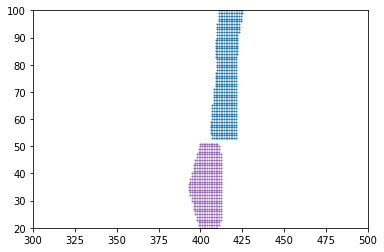

In [6]:
for instance in instances:
    plt.scatter(instance[:, 0], instance[:, 1], s=1)
plt.xlim(300, 500)
plt.ylim(20, 100)